In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

# Problem 1

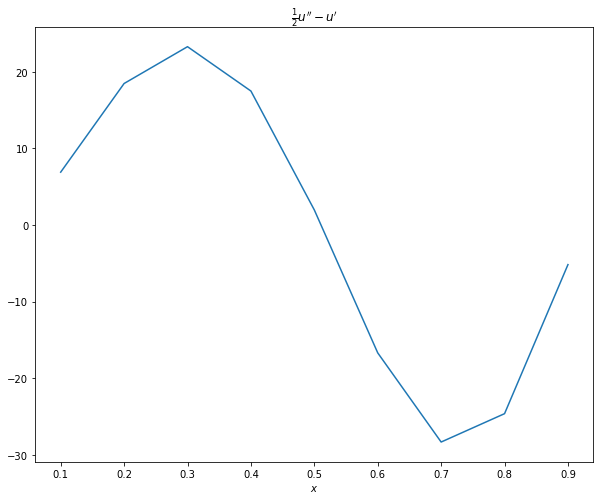

In [2]:
# define function u, domain, stepsize
u = lambda x: np.sin((x + np.pi)**2 - 1)
a,b,n = 0,1,10
x = np.linspace(a,b,n+1)
h = x[1] - x[0]
uX = u(x)

# calculating the first derivative
diag = np.diag(np.ones(n-2), 1) + np.diag(np.ones(n-2)*-1, -1)
adjust = np.zeros(n-1)
adjust[0] = -1*uX[0]/(2*h)
adjust[-1] = uX[-1]/(2*h)
uprime = (1./(2*h))*diag@uX[1:-1] + adjust

# calculating the second derivative
diag = diag + np.diag(np.ones(n-1)*-2) + np.diag(np.ones(n-2)*2, -1)
adjust[0] = -1*adjust[0]
adjust = adjust * 2 * (1./h)
udoubleprime = (1./(h**2))*diag@uX[1:-1] + adjust

# plot that lil fella
plt.figure(figsize=(10,8))
plt.plot(x[1:-1], .5*udoubleprime - uprime)
plt.rc('text', usetex=True)
plt.title(r"$\frac{1}{2}u'' - u'$")
plt.xlabel(r'$x$')
plt.rc('text', usetex=False)
plt.show()

# Problem 2

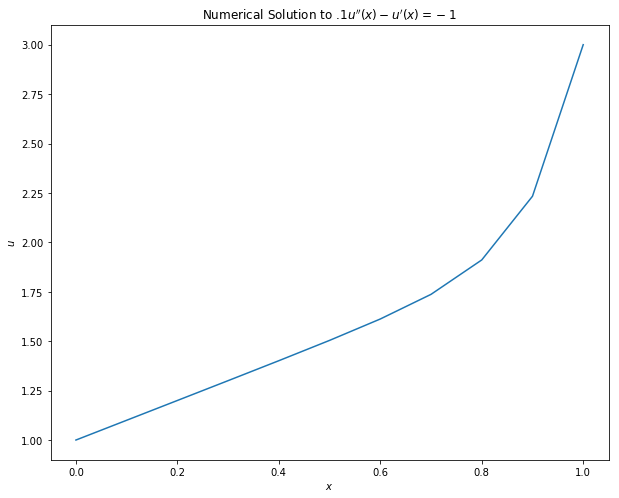

In [3]:
# eps*u" - u' = f(x) := -1 for x in (0,1)
alpha, beta, epsilon = 1, 3, .1
a,b,n = 0,1,10
x = np.linspace(a,b,n+1)
h = x[1] - x[0]

diag = np.diag(np.ones(n-2),1)*(epsilon - .5*h) \
        + np.diag(np.ones(n-1))*-2*epsilon \
        + np.diag(np.ones(n-2),-1)*(epsilon + .5*h)
diag = diag*(1./(h**2))
b = np.ones(n-1)*-1
b[0] = b[0] - alpha*((epsilon + h*.5)/(h**2))
b[-1] = b[-1] - beta*((epsilon - h*.5)/(h**2))
Usub = la.solve(diag, b)
U = np.ones(n+1)
U[1:-1] = Usub
U[0] = alpha
U[-1] = beta

plt.figure(figsize=(10,8))
plt.plot(x, U)
plt.rc('text', usetex=True)
plt.title(r"Numerical Solution to $.1u''(x) - u'(x) = -1$")
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.rc('text', usetex=False)
plt.plot()
plt.show()

# Problem 3

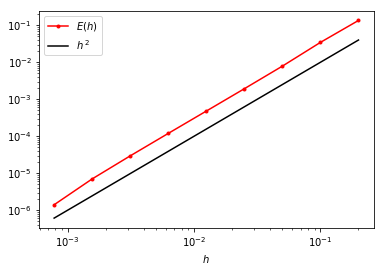

The order of the finite difference approximation is about  2.06975086992 .
The number of N required to have four decimals accuracy is about: 118.0


In [4]:
def bvp(func, epsilon, alpha, beta, N):
    a,b,n = 0, 1, N
    x = np.linspace(a,b,n+1)
    # h = x[1] - x[0]
    h = 1./n
    diag = np.diag(np.ones(n-2),1)*(epsilon - .5*h) \
            + np.diag(np.ones(n-1))*-2*epsilon \
            + np.diag(np.ones(n-2),-1)*(epsilon + .5*h)
    diag = diag*(1./(h**2))
    # print("\nx: ", x[1:-1])
    c = func(x[1:-1])
    # print("func(x): ", c)
    c[0] = c[0] - alpha*((epsilon + h*.5)/(h**2))
    c[-1] = c[-1] - beta*((epsilon - h*.5)/(h**2))
    Uinterior = la.solve(diag, c)
    U = np.ones(n+1)
    U[1:-1] = Uinterior
    U[0] = alpha
    U[-1] = beta
    return U

num_approx = 10 # Number of Approximations
N = 5*np.array([2**j for j in range(num_approx)])
h, max_error = (1.-0)/N[:-1], np.ones(num_approx-1)

# Best numerical solution, used to approximate the true solution.
# bvp returns the grid, and the grid function, approximating the solution
# with N subintervals of equal length.
f = lambda x: np.ones_like(x)*-1
num_sol_best = bvp(f, epsilon=.1, alpha=1, beta=3, N=N[-1])
for j in range(len(N)-1):
    num_sol = bvp(f, epsilon=.1, alpha=1, beta=3, N=N[j])
    max_error[j] = np.max(np.abs(num_sol-num_sol_best[::2**(num_approx-j-1)]))
plt.loglog(h,max_error,'.-r',label="$E(h)$")
plt.loglog(h,h**(2.),'-k',label="$h^{\, 2}$")
# plt.loglog(np.ones(10)*10**(-2.07), np.linspace(1e-7,1e0, 10))
# plt.loglog(np.linspace(1e-4, 1e0, 10) , np.ones(10)*1e-4)

plt.xlabel("$h$")
plt.legend(loc='best')
plt.show()
print("The order of the finite difference approximation is about ",
      (np.log(max_error[0])-np.log(max_error[-1]))/(np.log(h[0])-np.log(h[-1])),
      ".")
print("The number of N required to have four decimals accuracy is about: {}".format(np.ceil(1/(10**(-2.07)))))

# Problem 4

In [5]:
def bvp_solve(F, A1, A2, A3, a, b, alpha, beta, N):
    n = N
    x = np.linspace(a,b,n+1)
    h = np.abs(b-a)/n
    f = F(x)
    a1 = A1(x)
    a2 = A2(x)
    a3 = A3(x)

    diag = np.diag(2*a1[1:-2] + h*a2[1:-2], 1) \
            + np.diag(2*h**2 * a3[1:-1] - 4*a1[1:-1]) \
            + np.diag(2*a1[2:-1] - h*a2[2:-1],-1)
    diag = diag*(.5/(h**2))
    
    f[1] = f[1] - alpha*(2*a1[1] - h*a2[1])*(1./(2*h**2))
    f[-2] = f[-2] - beta*(2*a1[-2] + h*a2[-2])*(1./(2*h**2))

    Usub = la.solve(diag, f[1:-1])
    U = np.ones(n+1)
    U[1:-1] = Usub
    U[0] = alpha
    U[-1] = beta
    return x, U

    plt.plot(x, U)
    plt.rc('text', usetex=True)
    plt.title(r"Numerical Solution to arbitrary bvp")
    plt.xlabel(r'$x$')
    plt.ylabel(r'$u$')
    plt.rc('text', usetex=False)
    plt.plot()
    plt.show()

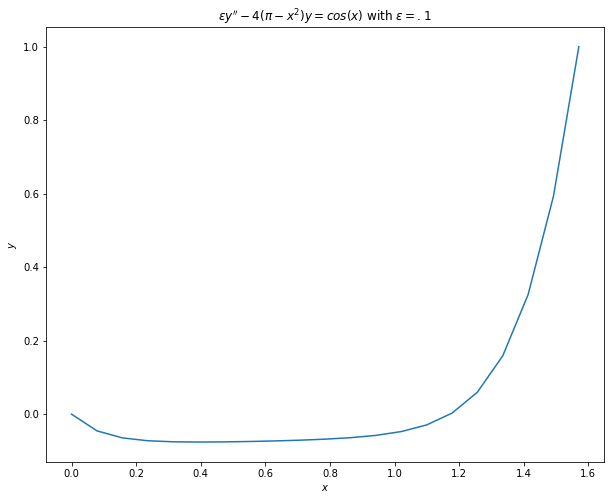

In [6]:
f = lambda x: np.cos(x)
a1 = lambda x: np.ones_like(x)*.1
a2 = lambda x: np.zeros_like(x)
a3 = lambda x: -4*(np.pi - x**2)
x, y = bvp_solve(f,a1,a2,a3,0, .5*np.pi, 0, 1, 20)

plt.figure(figsize=(10,8))
plt.plot(x, y)
plt.rc('text', usetex=True)
plt.title(r"$\epsilon y'' - 4(\pi - x^2)y = cos(x)$ with $\epsilon = .1$")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.rc('text', usetex=False)
plt.show()

# Problem 5

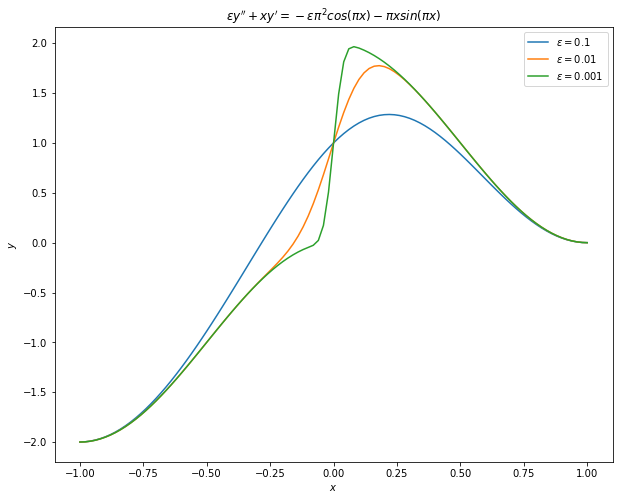

In [7]:
plt.figure(figsize=(10,8))
for epsilon in [.1, .01, .001]:
    #print("\n\nepsilon = {}".format(epsilon))
    f = lambda x: -epsilon*(np.pi**2)*np.cos(np.pi*x) - np.pi*x*np.sin(np.pi*x)
    a3 = lambda x: np.zeros_like(x)
    a2 = lambda x: x
    a1 = lambda x: np.ones_like(x)*epsilon
    
    x, y = bvp_solve(f,a1,a2,a3,-1,1, -2, 0, 100)
    
    # plt.rc('text', usetex=True)
    plt.plot(x, y, label="$\epsilon = {}$".format(epsilon))
    plt.title(r"$\epsilon y'' + xy' = -\epsilon \pi^2 cos(\pi x) - \pi xsin(\pi x)$")
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    #plt.rc('text', usetex=False)
plt.legend()
plt.show()

# Problem 6

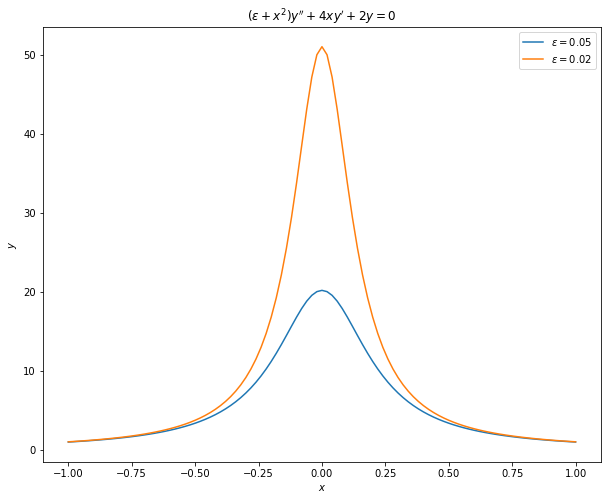

In [8]:
plt.figure(figsize=(10,8))
for epsilon in [.05, .02]:
    f = lambda x: np.zeros_like(x)
    a1 = lambda x: (epsilon + x**2)
    a2 = lambda x: 4*x
    a3 = lambda x: np.ones_like(x)*2
    x, y = bvp_solve(f, a1, a2, a3, -1, 1, 1/(1 + epsilon), 1/(1 + epsilon), 100)
    
    plt.plot(x, y, label="$\epsilon = {}$".format(epsilon))
    plt.title(r"$(\epsilon + x^2)y'' + 4xy' + 2y = 0$")
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
plt.legend()
plt.show()